In [1]:
# Library Imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.spatial import KDTree
import seaborn as sns
from astrodendro import Dendrogram
from tqdm import tqdm
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar

from aRead import readAREPO, readImage
from peakFilteringFunctions import allFilters
import constants as c

### Core Mass Function

In [2]:
def coreMassFunction(imagePath, minVal=22.3, minPix=10, minDelta=0.09):
    # Load in the image data
    image = readImage(imagePath)

    # Create the grid and column density map
    columnGrid = image.image * image.umass_g / (1.4*c.mProt()*image.ulength_cm**2)

    # Find the pixel size
    #pixSize = (image.x1-image.x0) * (image.y1-image.y0) * image.ulength_cm**2 / (image.nx*image.ny)
    pixSize = 2.4414062499999997e+32

    # Create the dendrogram
    dendro = Dendrogram.compute(np.log10(columnGrid), min_value=minVal, min_npix=minPix, min_delta=minDelta)

    # Calculate the CMF 
    masses = np.zeros(len(dendro.leaves))
    for i in range(len(dendro.leaves)):
        pixVals = 10**dendro.leaves[i].values() * 1.4 * c.mProt() * pixSize

        masses[i] = np.sum(pixVals) / c.uMass()
        
    print("Done")

    return masses

In [ ]:
m1 = coreMassFunction("./imageFiles/UV1r1zoomCentre2.dat")
m2 = coreMassFunction("./imageFiles/UV10r1zoomCentre.dat")
m3 = coreMassFunction("./imageFiles/UV100r1zoomCentre.dat")
m4 = coreMassFunction("./imageFiles/UV1000r1zoomCentre.dat")

m1cr = coreMassFunction("./imageFiles/UV1attenuatedZoomCentre.dat")
m1000cr = coreMassFunction("./imageFiles/UV1000attenuatedZoomCentre.dat")

Done
Done
Done
Done
Done
Done


#### Cumulative Core Mass Function

Text(0, 0.5, 'Cumulative Fraction')

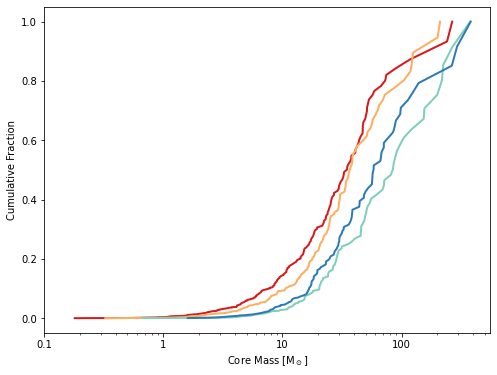

In [4]:
m1s = np.sort(m1)
m1c = np.cumsum(m1s)
m2s = np.sort(m2)
m2c = np.cumsum(m2s)
m3s = np.sort(m3)
m3c = np.cumsum(m3s)
m4s = np.sort(m4)
m4c = np.cumsum(m4s)

plt.figure(figsize=(8,6))
plt.rcParams["figure.dpi"] = 120
plt.plot(m1s, m1c/m1c[-1], c.colours()[0], linewidth=2)
plt.plot(m2s, m2c/m2c[-1], c.colours()[1], linewidth=2)
plt.plot(m3s, m3c/m3c[-1], c.colours()[3], linewidth=2)
plt.plot(m4s, m4c/m4c[-1], c.colours()[4], linewidth=2)

totMasses = [m1, m2, m3, m4]

plt.xscale("log")
plt.xticks([0.1, 1, 10, 100], ["0.1", "1", "10", "100"])
plt.xlabel("Core Mass [$\\rm M_\odot$]")
plt.ylabel("Cumulative Fraction")

In [5]:
from scipy.optimize import curve_fit

def func(x, a, b):
    return a * x**(-b)

#### Raw Core Mass Function

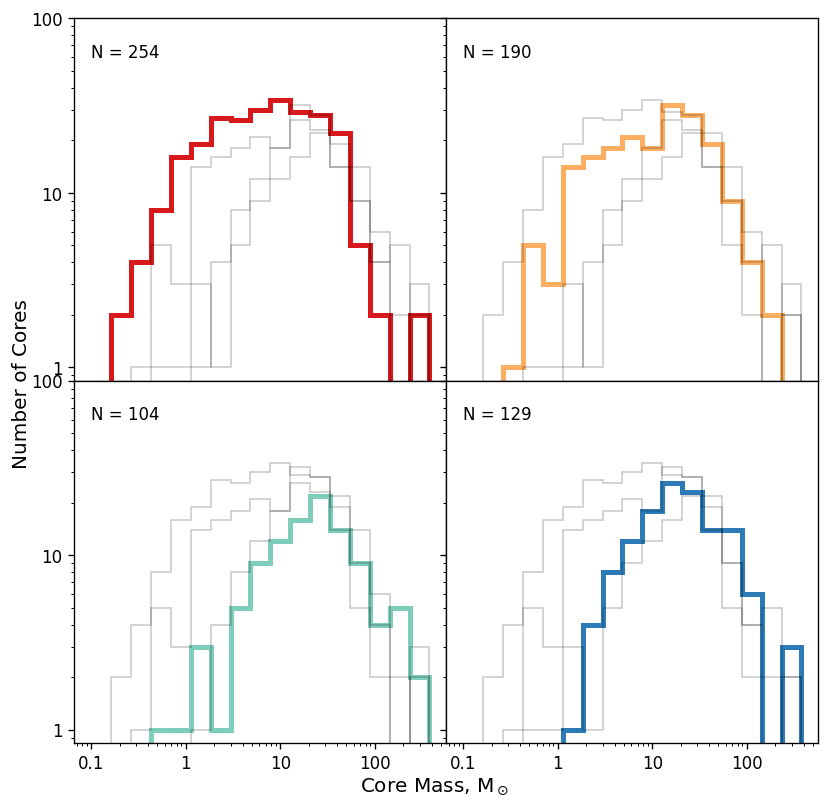

In [6]:
fig, axs = plt.subplots(2,2, figsize=(8,8), sharex=True)
fig.subplots_adjust(hspace=0, wspace=0)

fig.supxlabel("Core Mass, $\\rm M_\odot$", y=0.07)
fig.supylabel("Number of Cores", x=0.06)

# Setup parameters
colors = [c.colours()[0], c.colours()[1], c.colours()[3], c.colours()[4]]
x = np.linspace(0, 2.2, 100)
bins = 10**np.linspace(-1, np.max(np.log10(totMasses[-1])), 18)

xs = [0,0,1,1]
ys = [0, 1, 0, 1]

for i in range(4):
    thisPlot = totMasses[i]
    notThisPlot = totMasses[:i] + totMasses[i+1:]

    ax = axs[xs[i], ys[i]]

    hist = ax.hist(thisPlot, bins=bins, histtype="step", color=colors[i], linestyle="-", label="UV1", linewidth=3)
    hist = ax.hist(notThisPlot,  bins=bins, histtype="step", color=["k", "k", "k"], linestyle="-", alpha=0.2)
    
    ax.set_yscale("log")
    ax.set_xscale("log")
    ax.set_xticks([0.1, 1, 10, 100], ["0.1", "1", "10", "100"])
    
    if i == 1 or i == 3:
        ax.set_yticks([1, 10, 100])
        ax.set_yticklabels([])
    else:
        ax.set_yticks([1, 10, 100])
        ax.set_yticklabels(["1", "10", "100"])

    ax.text(0.1,60, "N = %s" % len(thisPlot))


#### Raw and Cumulative Core Mass Function

Text(0.08, 0.5, 'Number of Cores')

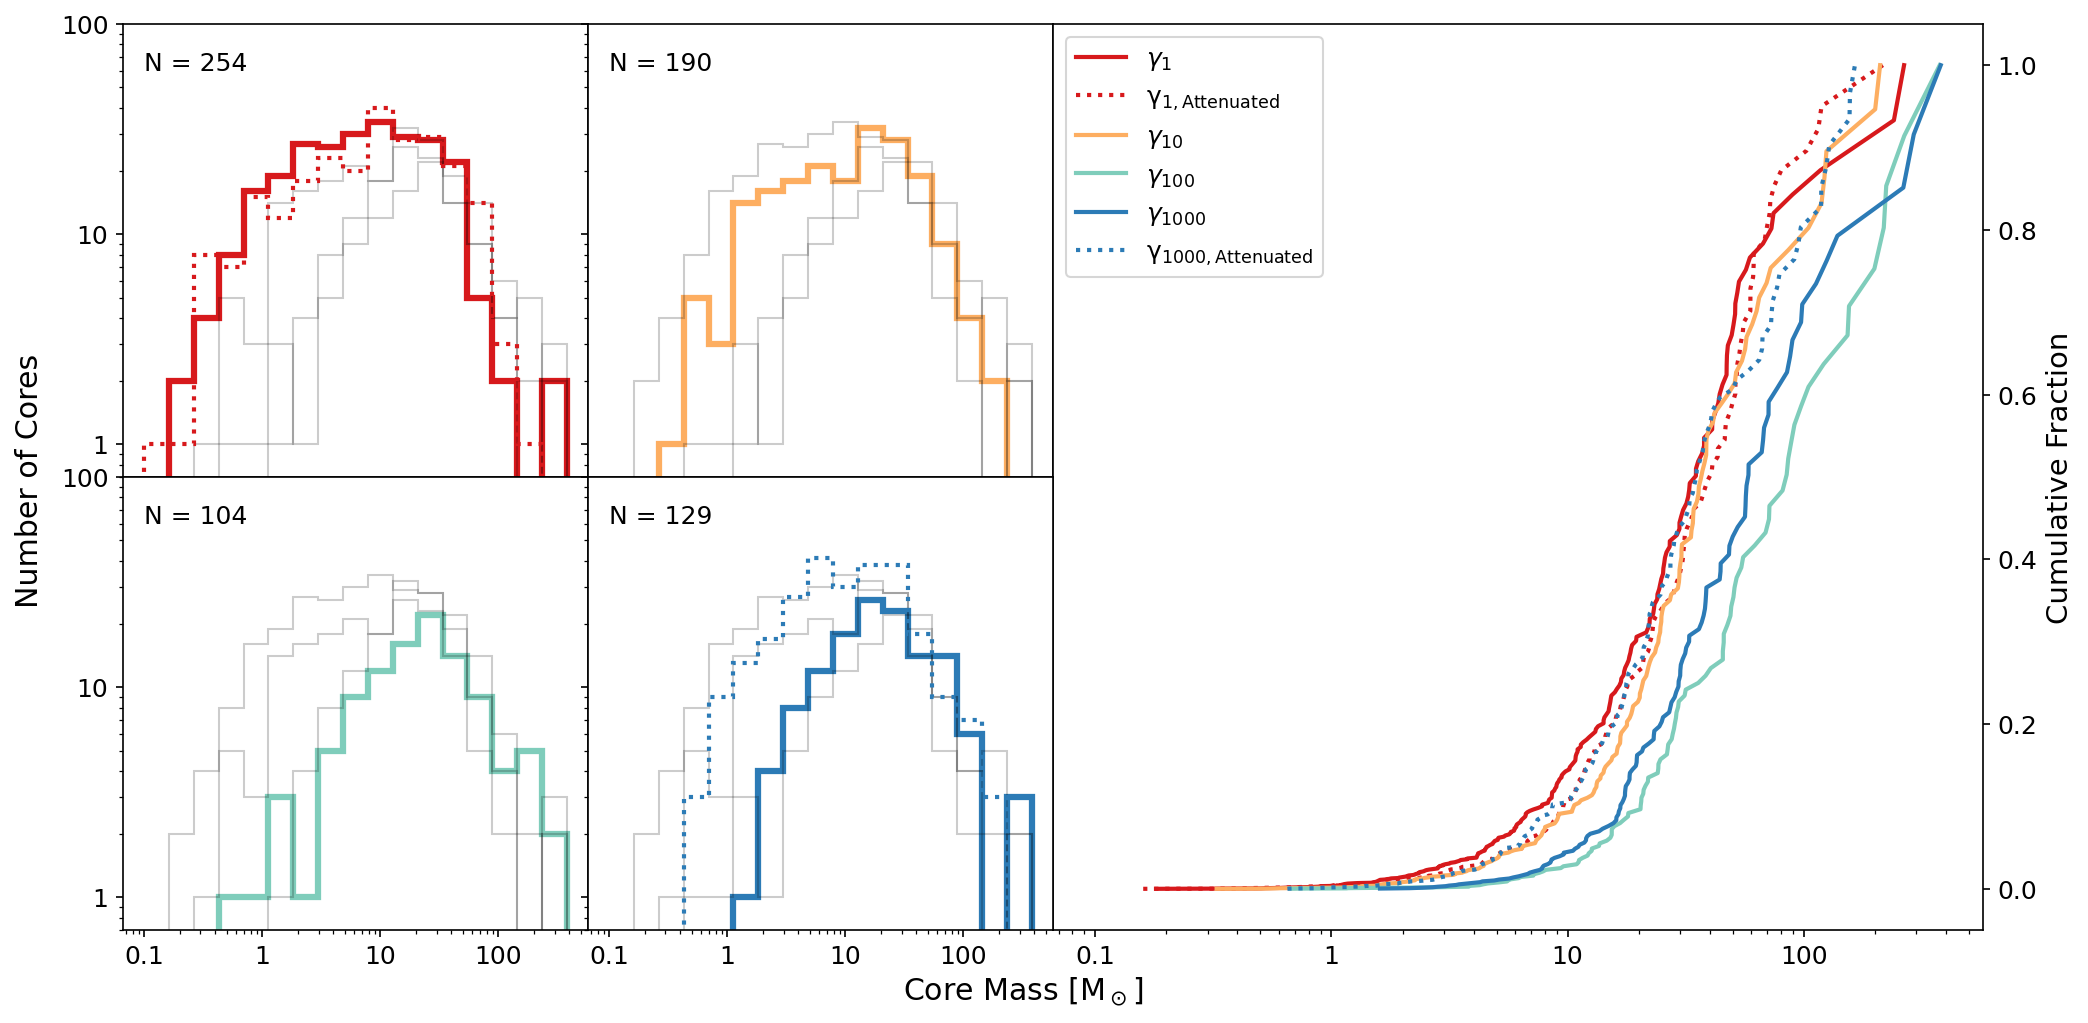

In [7]:
plt.style.use("mattStyle")

# Setup the figure and adjust
fig, axs = plt.subplot_mosaic([['upper left', 'upper center', 'right', 'right'],
                               ['lower left', 'lower center', 'right', 'right']],
                              figsize=(16, 8), sharex=True)
fig.subplots_adjust(hspace=0, wspace=0)

axes = ["upper left", "upper center", "lower left", "lower center"]
labels = ["$\\gamma_1$", "$\\gamma_{10}$", "$\\gamma_{100}$", "$\\gamma_{1000}$"]
bins = 10**np.linspace(-1, np.max(np.log10(totMasses[-1])), 18)
x = np.linspace(0.7, np.max(np.log10(bins)), 100)

# Plot the normal CMFs
for i in range(4):
    thisPlot = totMasses[i]
    notThisPlot = totMasses[:i] + totMasses[i+1:]

    hist = axs[axes[i]].hist(thisPlot, bins=bins, histtype="step", color=colors[i], linestyle="-", label="UV1", linewidth=3)
    hist = axs[axes[i]].hist(notThisPlot,  bins=bins, histtype="step", color=["k", "k", "k"], linestyle="-", alpha=0.2)
    #axs[axes[i]].plot(10**x, 300*(10**x)**(-1.35), "k", linestyle="--", linewidth=2)
    
    if i == 0:
        hist = axs[axes[i]].hist(m1cr, bins=bins, histtype="step", color=colors[i], linestyle=":", linewidth=2)
    elif i == 3:
        hist = axs[axes[i]].hist(m1000cr, bins=bins, histtype="step", color=colors[i], linestyle=":", linewidth=2)

    axs[axes[i]].set_xscale("log")
    axs[axes[i]].set_yscale("log")

    axs[axes[i]].set_xticks([0.1, 1, 10, 100])
    axs[axes[i]].set_xticklabels(["0.1", "1", "10", "100"])

    if i == 1 or i == 3:
        axs[axes[i]].set_yticks([1, 10, 100])
        axs[axes[i]].set_yticklabels([])
    else:
        axs[axes[i]].set_yticks([1, 10, 100])
        axs[axes[i]].set_yticklabels(["1", "10", "100"])

    axs[axes[i]].text(0.1,60, "N = %s" % len(thisPlot))
    axs[axes[i]].set_ylim(0.7, 100)

for i in range(4):
    mSort = np.sort(totMasses[i])
    mCum = np.cumsum(mSort)

    # Plot the data
    axs["right"].plot(mSort, mCum/mCum[-1], color=colors[i], linewidth=2, label=labels[i])
    
    if i == 0:
        mSort = np.sort(m1cr)
        axs["right"].plot(mSort, np.cumsum(mSort)/np.cumsum(mSort)[-1], color=colors[i], linewidth=2, linestyle=":", label="$\\rm \\gamma_{1,Attenuated}$")
    elif i == 3:
        mSort = np.sort(m1000cr)
        axs["right"].plot(mSort, np.cumsum(mSort)/np.cumsum(mSort)[-1], color=colors[i], linewidth=2, linestyle=":", label="$\\rm \\gamma_{1000,Attenuated}$")
    
    axs["right"].yaxis.tick_right()
    axs["right"].set_ylabel("Cumulative Fraction", fontsize=14)
    axs["right"].yaxis.set_label_position("right")

axs["right"].legend()

fig.supxlabel("Core Mass $\\rm [M_\odot]$", y=0.06)
fig.supylabel("Number of Cores", x=0.08)